## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [27]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [28]:
df = pd.read_csv('ab_data.csv')

df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [29]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [30]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [31]:
df_conv = df[df['converted'] == 1].count()
total = df['converted'].count()

#Proportion is calculated by the users having coverted value as 1 divided by all users
prop = (df_conv['converted'] / total) * 100

print(prop)

11.9659193556


e. The number of times the `new_page` and `treatment` don't line up.

In [32]:
df_null = df[(df['group'] == 'control') & (df['landing_page'] == 'old_page')]
df_alt = df[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]

#Merged those rows with combination 'control/old_page' and 'treatment/new_page' into a single dataframe

df_dummy = pd.concat([df_null, df_alt])

#Taking the count of those rows where new_page and treatment dont't line up

df_count = df['converted'].count() - (df_null['converted'].count() + df_alt['converted'].count())

print (df_count)



3893


##### f. Do any of the rows have missing values?

In [33]:
df.isnull().any().any()

#df_times['landing_page'].unique()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [34]:
#Selecting rows with combination as treatment/new or control/old

df_not_treat_new = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page')) == True]
df_not_cntrl_old = df[((df['group'] == 'control') & (df['landing_page'] == 'old_page')) == True]

#New dataframe DF2 is created with the corresponding changes
df2 = pd.concat([df_not_treat_new, df_not_cntrl_old])



In [35]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [36]:
df2['user_id'].nunique()


290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [37]:
#Finding the duplicated user id

df2[df2['user_id'].duplicated()]


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [38]:
#Daisplaying the row information of the duplicated user id

print (df2[df['user_id'] == 773192])

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [39]:
#Dropping duplicate rows

df2 = df2.drop_duplicates(subset=['user_id'])


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [40]:
#Finding probalility of a conversion of  an individual in general

df2_conv = df2[df2['converted'] == 1].count()
total = df2['converted'].count()

#Probality is calculated by the users having coverted value as 1 divided by all users
prop2 = (df2_conv['converted'] / total) 

print(prop2)

0.119597087245


b. Given that an individual was in the `control` group, what is the probability they converted?

In [42]:
#Conversion for a person in control group

df2_cntrl = df2.query('group == "control"')
                
df2_cntrl_conv = df2_cntrl[df2_cntrl['converted'] == 1].count()
total = df2_cntrl['converted'].count()

#Probality is calculated by the users having coverted value as 1 divided by all users
prop_cntrl = (df2_cntrl_conv['converted'] / total) 

print(prop_cntrl)                   
                  
            

0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [43]:
#Conversion for a person in Treatment group

df2_treat = df2.query('group == "treatment"')
                
df2_treat_conv = df2_treat[df2_treat['converted'] == 1].count()
total = df2_treat['converted'].count()

#Probality is calculated by the users having coverted value as 1 divided by all users
prop_treat = (df2_treat_conv['converted'] / total) 

print(prop_treat)                   
                

0.118808065515


d. What is the probability that an individual received the new page?

In [44]:
#Probability that an individual received the new page

df2_new = df2.query('landing_page == "new_page"')['landing_page'].count()
  

#df2_new_page = df2_new[df2_new['converted'] == 1].count()
total = df2['landing_page'].count()

#Probality is calculated by the users having new_page divided by all users
prob = (df2_new / total)

print(prob)   

0.500061944223


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Your answer goes here.**
### The difference in the probability of conversion between the control and treatment group is not substantial enough to draw any particluar conclusion in favour of any page.  

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**
#Finding the converted rates for old and new page from the original dataset


In [45]:
#Old page

df_old = df.query('landing_page == "old_page"')

p_old = df_old[df_old['converted'] == 1]['converted'].count() / df_old[['converted']].count()

#p_old = df_old[df_old['converted'] == 1].mean()
print (p_old)

converted    0.120478
dtype: float64


In [46]:
#New page

df_new = df.query('landing_page == "new_page"')

p_new = df_new[df_new['converted'] == 1]['converted'].count() / df_new[['converted']].count()

#p_old = df_old[df_old['converted'] == 1].mean()
print (p_new)

converted    0.118841
dtype: float64


### The above converted rates for both old and new page is 0.120478 and 0.118841 respectively


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [51]:
#Conversion rate of new page

df_new = df2.query('landing_page == "new_page"')
p_new = df2['converted'].mean()

print(p_new)

0.119597087245


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [52]:
#Conversion rate of old page

df_old = df2.query('landing_page == "old_page"')
p_old = df2['converted'].mean()

print(p_old)

0.119597087245


c. What is $n_{new}$?

In [53]:
#Number of samples of new page
n_new = df_new.shape[0]

print(n_new)

145310


d. What is $n_{old}$?

In [54]:
#Number of samples of old page
n_old = df_old.shape[0]

print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [64]:
new_page_converted = np.random.choice(2, size = n_new, p=[0.8805, 0.1195])


#print(new_page_converted)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [59]:
old_page_converted = np.random.choice(2, size = n_old, p=[0.8805, 0.1195])


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [67]:
obs_diff = new_page_converted.mean() - old_page_converted.mean()

print(obs_diff)

0.000459397536049


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [70]:
# Simulating 10000 p_new - p_old values

p_diffs = np.random.binomial(n_new, p_new, 10000)/n_new - np.random.binomial(n_old, p_old, 10000)/n_old

#p_diffs[:5]

array([-0.00027739, -0.00256266,  0.00109219, -0.00124764, -0.00175708])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

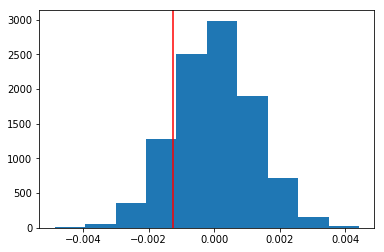

In [72]:

# plot sampling distribution
plt.hist(p_diffs);

plt.axvline(-0.00127,color='red')


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [73]:
# Actual difference
act_diff = prop_treat - prop_cntrl

#Proportion 

(p_diffs > act_diff).mean()

0.90239999999999998

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

90% of the differences attributed to pure chance from our simulation based on the NULL in Part II 2h is higher than the observed difference we see in our dataset. So basically, the observed difference in our dataset is only higher than ~10% of the simulated difference assuming both pages are the same. Hence it is Not Significant.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [77]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]


print (convert_old , convert_new , n_old , n_new)

17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [81]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score, p_value)


-1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

We fail to reject the Null hypothesis since the z score is less than the critical value and p value is so high.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

Logistic regression will be performed over here , since it is a categrorial column that we are analysing.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [83]:
#Create a intercept column
df2['intercept'] = 1

#Create a dummy column ab_page
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']


df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [84]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 May 2018   Pseudo R-squ.:               8.077e-06
Time:                        04:14:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [85]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 May 2018   Pseudo R-squ.:               8.077e-06
Time:                        04:15:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

Since the p value of 0.190 is greater than 0.05, hence we fail to reject the Null hypothesis i.e the new page cannot be considered better than the old one. It is less effective or equal to the old one.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
There are many factors that might influence whether or not someone converts besides which landing page they hit.  Of course, when adding additional terms into the regressional model it's important to consider that they are not correlated.



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [87]:
#Loaded the countries dataset
df_country = pd.read_csv('countries.csv')

#Merged two dataframes and created a new one
df3 = pd.merge(df2, df_country, on="user_id")

#Created three dummy varibles based on the country
df3[['CA', 'UK', 'US',]] = pd.get_dummies(df3['country'])

df3= df3.drop('US', axis = 1)
df3.head()

#df3 = df3.rename(columns={'user_iduser_id': 'user_id, 'oldName2': 'newName2'})
#df.dropna() 
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [88]:
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'CA' , 'UK']])
results = log_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 16 May 2018   Pseudo R-squ.:               1.521e-05
Time:                        04:20:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

From the above statistics , it is observed that p value is 0.1984 which is greater than 0.05. Hence country has no influence in converson rate.

In [91]:
# Checking for both country and  Page together

log_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page' , 'CA' , 'UK']])
results = log_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 16 May 2018   Pseudo R-squ.:               2.323e-05
Time:                        04:28:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

Even with country and page together, the P value of 0.1760 is greater than 0.05.
Hence it could be concluded that all these factors are not significant enough to justify that new page is better than the old.  Thus after all the above analysis, it could be inferred that OLD page is still better than or equal to the new landing page.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.